<a href="https://colab.research.google.com/github/elizamelo/LabFis04/blob/main/LabFis4Espectroscopia_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

Laboratório de Física IV Prática 08 -09 : Espectrocopia I e II

In [2]:
# Fonte - ex.: Mercurio - Hg
Theta_ref1 =176 #graus - espectroscopio 1
Theta_ref2 =347 #graus - espectroscopio 2
Theta_ref3 =256 #graus - espectroscopio 3


In [3]:
#Alinhamento
x_d_1=168.5
x_e_1=183.3

x_d_2=339.7
x_e_2=354.4

x_d_3=263.5
x_e_3=248.6

theta_i_d_1 = abs(Theta_ref1-x_d_1)
theta_i_e_1 = abs(Theta_ref1-x_e_1)
a_esp1=abs(theta_i_d_1-theta_i_e_1)
print("theta_i_d_1:", theta_i_d_1,"; ","theta_i_e_1:",  np.round(theta_i_e_1,1),"; ","Alinhamento do Esp. 1:",  np.round(a_esp1, 2 ),".")

theta_i_d_2 = abs(Theta_ref2-x_d_2)
theta_i_e_2 = abs(Theta_ref2-x_e_2)
a_esp2=abs(theta_i_d_2-theta_i_e_2)
print("theta_i_d_2:", np.round(theta_i_d_2,1),"; ","theta_i_e_2:",  np.round(theta_i_e_2,1),"; ","Alinhamento do Esp. 2:",  np.round(a_esp2, 2 ),".")

theta_i_d_3 = abs(Theta_ref3-x_d_3)
theta_i_e_3 = abs(Theta_ref3-x_e_3)
a_esp3=abs(theta_i_d_3-theta_i_e_3)
print("theta_i_d_3:", theta_i_d_3,"; ","theta_i_e_3:", np.round(theta_i_e_3,1),"; ","Alinhamento do Esp. 3:",  np.round(a_esp3, 2 ),".")

theta_i_d_1: 7.5 ;  theta_i_e_1: 7.3 ;  Alinhamento do Esp. 1: 0.2 .
theta_i_d_2: 7.3 ;  theta_i_e_2: 7.4 ;  Alinhamento do Esp. 2: 0.1 .
theta_i_d_3: 7.5 ;  theta_i_e_3: 7.4 ;  Alinhamento do Esp. 3: 0.1 .


In [4]:
dataset=pd.read_excel('espctrocopio1.xlsx') #importação dos dados 
xdata=dataset['X'] # sen(theta)
ydata=dataset['Y'] # Comprimento de onda (Angtrom)

In [7]:
xbar = np.mean(xdata) # cálculo da média de xdata
ybar = np.mean(ydata)  # cálculo da média de ydata


a = np.sum(xdata*(ydata-ybar))/np.sum(xdata*(xdata-xbar)) #coef. angular estimado
b = ybar - a*xbar #coeficiente linear estimado


yest = a*xdata + b # função estimada

R_squared = np.sum((yest-ybar)**2)/np.sum((ydata-ybar)**2) #coef. de determinação
print("coef. angular (a): ", np.round(a,2))
print("coeficiente linear (b): ", np.round(b,2))
print("Equação da reta: y=",np.round(a,2),"*x +", np.round(b,2))

coef. angular (a):  -1156.21
coeficiente linear (b):  5662.69
Equação da reta: y= -1156.21 *x + 5662.69


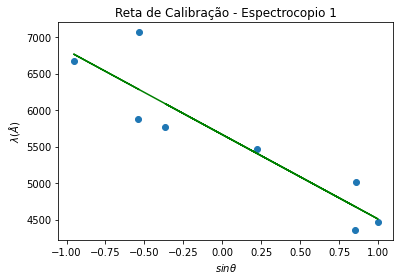

In [8]:
plt.figure()
plt.plot(xdata, yest, 'g', label = "fitted curve")
plt.scatter(xdata, ydata, label = "data")
plt.xlabel(r'$sin\theta$')#r'$\sigma_i=23$'
plt.ylabel(r'$\lambda(\AA)$' )
plt.title('Reta de Calibração - Espectrocopio 1')
plt.show()